## 5.1 Extreme value analysis with univariate methods

### three types of outliers:
1. **point outlier** - observataions anomalous WRT the majority of obs in a feature (aka *univariate outlier*)
2. **contextual outlier** - obs considered anomolous given specific context
3. **collective outlier** - collection of obs anomalous by appear close to one another because they all have a similar anom. value

### methods for outlier detection:
1. **Tukey** - extreme value analysis
2. multivariate analysis with boxplots and scatterplot matrices
3. machine learning DBSCAN and PCA

### Tukey boxplots:
* whiskers set at 1.5 * interquartile range (upper quartile - lower quartile)
    * if you see data past the whiskers, they are outliers
* Tukey outlier labeling is basically the same thing but done mathematically

In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib

In [13]:
matplotlib.rcParams.keys()

C:\Users\aweaver\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [43]:
matplotlib.rcParams['figure.figsize'] = 15, 8
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['boxplot.medianprops.linewidth'], matplotlib.rcParams['boxplot.medianprops.color'] = 2, 'red'

In [7]:
df = pd.read_csv('./Ch05/05_01/iris.data.csv', header=None)
df.columns = 'sepal_length sepal_width petal_length petal_width species'.split()
X, y = df.iloc[:, :4].values, df.iloc[:,4].values
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


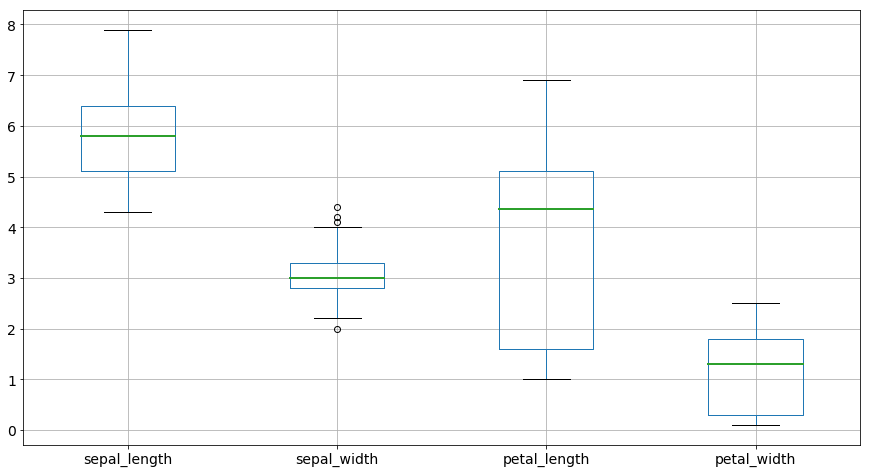

In [44]:
# ID outliers from Tukey boxplots
df.boxplot(return_type='dict')
plt.plot();plt.show()

In [21]:
#look at sepal width outliers
sepal_width = df.query('sepal_width > 4 or sepal_width < 2.05')
sepal_width

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


### apply Tukey outlier labeling

In [27]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(X)
X_df.describe()

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [33]:
#interquartile range
IQR = X_df.describe()
IQR.loc['IQR', :] = IQR.loc['75%', :] - IQR.loc['25%', :]
IQR.loc['tukey_min', :] = IQR.loc['25%', :] - (1.5 * IQR.loc['IQR', :])
IQR.loc['tukey_max', :] = IQR.loc['75%', :] + (1.5 * IQR.loc['IQR', :])
# IQR.loc['min_outlier', :] = True if IQR.loc['min', :] < IQR.loc['min_outlier', :] else False
# IQR.loc['max_outlier', :] = True if IQR.loc['max', :] > IQR.loc['max_outlier', :] else False


IQR.loc['count mean std min tukey_min tukey_max max'.split()]

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
tukey_min,3.15,2.05,-3.65,-1.95
tukey_max,8.35,4.05,10.35,4.05
max,7.90,4.40,6.90,2.50


* from above, conclude that variable '1' has values both above and below threshold for possible outliers

## 5.2 Mulitvariate analysis for outlier detection

